# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
# Display first few rows to get a sense of the structure
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [10]:
# Shape, columns, missing values, duplicates
print("Shape:", df_data.shape)
print("\nColumns:", df_data.columns.tolist())
print("\nMissing values:\n", df_data.isna().sum())
print("\nDuplicate rows:", df_data.duplicated().sum())

# Optional: overview of data types
print("\nData types:")
print(df_data.dtypes)


Shape: (4324, 9)

Columns: ['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']

Missing values:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Duplicate rows: 0

Data types:
Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object


In [12]:
df_data.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,"4,324.00","4,324.00",4324,4324,4324,4324,4324,964,4324
unique,NaN,NaN,56,137,4319,4278,2,56,4
top,NaN,NaN,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,NaN,NaN,1777,235,2,6,3534,136,3879
mean,"2,161.50","2,161.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,"1,248.38","1,248.38",NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,"1,080.75","1,080.75",NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,"2,161.50","2,161.50",NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,"3,242.25","3,242.25",NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [13]:
# Check how many missing values each column has
missing_values = df_data.isna().sum()
print("Missing values per column:\n", missing_values)

# Check for columns that are completely empty
empty_cols = [col for col in df_data.columns if df_data[col].isna().all()]
print("\nColumns that are completely empty:", empty_cols)

# Check for columns with same value repeated (no useful info)
for col in df_data.columns:
    if df_data[col].nunique() == 1:
        print(f"Column '{col}' has only one unique value:", df_data[col].unique()[0])


Missing values per column:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

Columns that are completely empty: []


In [14]:
# Drop completely empty columns
df_data = df_data.drop(columns=empty_cols)

# Drop duplicates if any
df_data = df_data.drop_duplicates()

# Verify shape after cleaning
print("New shape after cleaning:", df_data.shape)

# Confirm missing values again
print("\nRemaining missing values:\n", df_data.isna().sum())


New shape after cleaning: (4324, 9)

Remaining missing values:
 Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64


## Descriptive Statistics

In [15]:
# Summary statistics for numeric columns
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [16]:
# Explore basic info for non-numeric columns and value counts
print("Data types:\n", df_data.dtypes)

# Look at categorical columns (e.g., company, location, status)
categorical_cols = df_data.select_dtypes(include='object').columns.tolist()
print("\nCategorical columns:", categorical_cols)

# Show top values for a few important columns
for col in categorical_cols[:5]:  # limit to first 5 text columns
    print(f"\nTop values in '{col}':")
    print(df_data[col].value_counts().head())


Data types:
 Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

Categorical columns: ['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price', 'Mission_Status']

Top values in 'Organisation':
Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
Name: count, dtype: int64

Top values in 'Location':
Location
Site 31/6, Baikonur Cosmodrome, Kazakhstan    235
Site 132/1, Plesetsk Cosmodrome, Russia       216
Site 43/4, Plesetsk Cosmodrome, Russia        202
Site 41/1, Plesetsk Cosmodrome, Russia        198
Site 1/5, Baikonur Cosmodrome, Kazakhstan     193
Name: count, dtype: int64

Top values in 'Date':
Date
Wed Nov 05, 2008 00:15 UTC    2
Sun Aug 25, 1991 08:40 UTC    2
Wed Feb 07, 1990 01:33 UTC    2
Tue 

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [18]:
# Count number of launches per company/organization
launches_per_company = df_data['Organisation'].value_counts().sort_values(ascending=False)

# Display top 10
launches_per_company.head(10)

Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
Name: count, dtype: int64

C:\Users\angel\AppData\Local\Temp\ipykernel_42424\1648464178.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


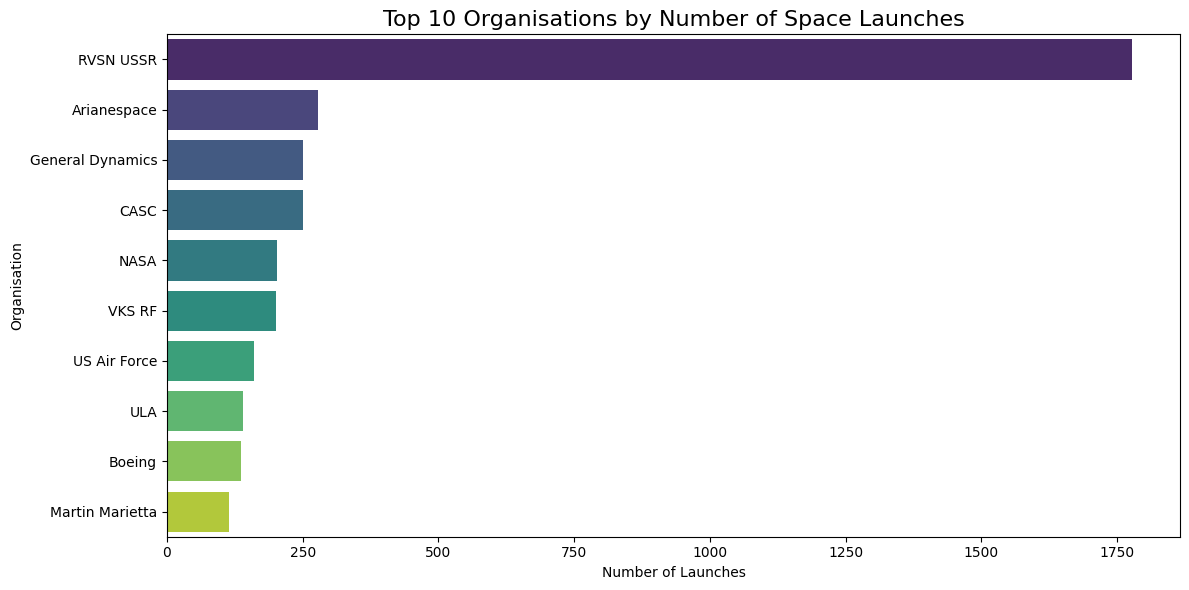

In [19]:
# Plot top 10 organizations by number of launches
plt.figure(figsize=(12,6))
sns.barplot(
    x=launches_per_company.head(10).values,
    y=launches_per_company.head(10).index,
    palette="viridis"
)

plt.title("Top 10 Organisations by Number of Space Launches", fontsize=16)
plt.xlabel("Number of Launches")
plt.ylabel("Organisation")
plt.tight_layout()
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [20]:
# Count how many rockets are active vs retired (decommissioned)
rocket_status_counts = df_data['Rocket_Status'].value_counts()

rocket_status_counts


Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

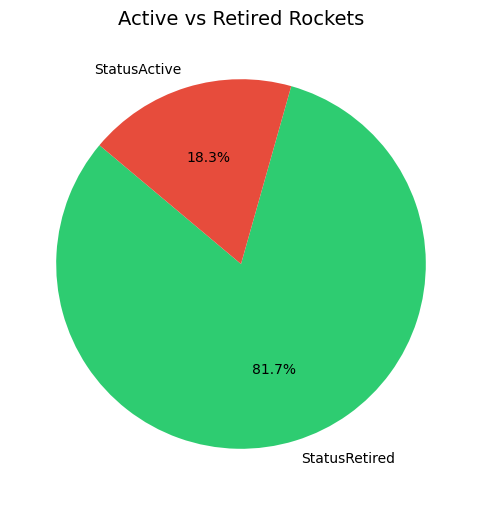

In [24]:
# Plot a pie chart of rocket statuses
plt.figure(figsize=(6,6))
plt.pie(
    rocket_status_counts.values,
    labels=rocket_status_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=["#2ecc71", "#e74c3c"]  # green for active, red for retired
)

plt.title("Active vs Retired Rockets", fontsize=14)
plt.show()


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [25]:
# Count each mission status (e.g., Success, Failure, Partial Failure, etc.)
mission_status_counts = df_data['Mission_Status'].value_counts()

mission_status_counts


Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

C:\Users\angel\AppData\Local\Temp\ipykernel_42424\848585856.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


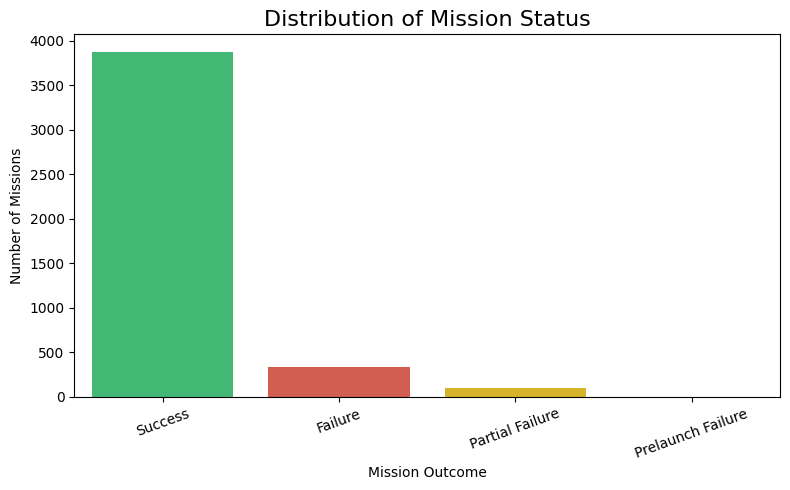

In [26]:
# Plot the distribution of mission outcomes
plt.figure(figsize=(8,5))
sns.barplot(
    x=mission_status_counts.index,
    y=mission_status_counts.values,
    palette=["#2ecc71", "#e74c3c", "#f1c40f", "#95a5a6"]
)

plt.title("Distribution of Mission Status", fontsize=16)
plt.xlabel("Mission Outcome")
plt.ylabel("Number of Missions")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [27]:
# Convert 'Price' column to numeric (in millions USD)
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')

# Drop rows with missing price values
price_data = df_data['Price'].dropna()

# Quick check
price_data.describe()


count   949.00
mean    129.80
std     143.22
min       5.30
25%      40.00
50%      62.00
75%     164.00
max     450.00
Name: Price, dtype: float64

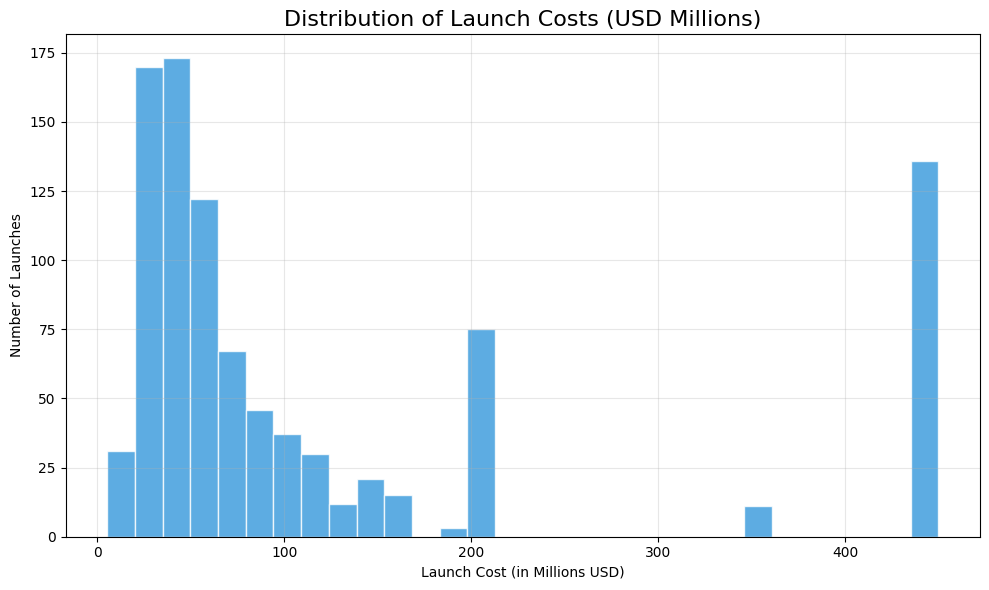

In [28]:
# Plot a histogram of launch prices
plt.figure(figsize=(10,6))
plt.hist(price_data, bins=30, color="#3498db", edgecolor="white", alpha=0.8)

plt.title("Distribution of Launch Costs (USD Millions)", fontsize=16)
plt.xlabel("Launch Cost (in Millions USD)")
plt.ylabel("Number of Launches")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [29]:
import plotly.express as px
from iso3166 import countries

# Extract country from 'Location' (assuming country name is last part)
df_data['Country'] = df_data['Location'].apply(lambda x: str(x).split(",")[-1].strip())

# Fix known irregular country names
country_corrections = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA"
}

df_data['Country'] = df_data['Country'].replace(country_corrections)

# Preview the unique country names
df_data['Country'].unique()[:20]


array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russian Federation', 'Iran', 'France', 'India', 'North Korea',
       'Pacific Ocean', 'South Korea', 'Brazil', 'Kenya', 'Australia'],
      dtype=object)

In [31]:
import iso3166

def get_alpha3(name):
    try:
        # This works across all iso3166 versions
        return iso3166.countries.get(name).alpha3
    except Exception:
        return None

df_data['Country_Code'] = df_data['Country'].apply(get_alpha3)

# Drop rows without a valid country code
df_data = df_data.dropna(subset=['Country_Code'])

# Group by country and count launches
launches_by_country = df_data['Country_Code'].value_counts().reset_index()
launches_by_country.columns = ['Country_Code', 'Launch_Count']

launches_by_country.head()


,Country_Code,Launch_Count
0,RUS,1398
1,USA,1351
2,KAZ,701
3,FRA,303
4,CHN,269


In [32]:
fig = px.choropleth(
    launches_by_country,
    locations='Country_Code',
    color='Launch_Count',
    color_continuous_scale='matter',
    title='Number of Space Launches by Country',
    labels={'Launch_Count': 'Number of Launches'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_x=0.5
)

fig.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [33]:
# Filter only failed missions (adjust string if your dataset uses a different label, e.g. "Failure", "Failed")
failed_df = df_data[df_data['Mission_Status'].str.contains("Fail", case=False, na=False)]

# Group by country code and count failures
failures_by_country = failed_df['Country_Code'].value_counts().reset_index()
failures_by_country.columns = ['Country_Code', 'Failure_Count']

# Preview top results
failures_by_country.head(10)


,Country_Code,Failure_Count
0,USA,163
1,RUS,93
2,KAZ,93
3,CHN,25
4,FRA,18
5,JPN,13
6,IND,13
7,AUS,3
8,BRA,3
9,NZL,2


In [34]:
import plotly.express as px

fig = px.choropleth(
    failures_by_country,
    locations='Country_Code',
    color='Failure_Count',
    color_continuous_scale='Reds',  # Red scale fits failure theme
    title='Number of Mission Failures by Country',
    labels={'Failure_Count': 'Number of Failures'}
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    title_x=0.5
)

fig.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [37]:
# Ensure relevant columns exist and have no missing values
sunburst_df = df_data[['Country', 'Organisation', 'Mission_Status']].dropna()

# Quick check
sunburst_df.head()


,Country,Organisation,Mission_Status
0,USA,SpaceX,Success
1,China,CASC,Success
2,USA,SpaceX,Success
3,Kazakhstan,Roscosmos,Success
4,USA,ULA,Success


In [38]:
# Count the number of missions per combination
sunburst_grouped = (
    sunburst_df.groupby(['Country', 'Organisation', 'Mission_Status'])
    .size()
    .reset_index(name='Count')
)

# Preview the data
sunburst_grouped.head(10)


,Country,Organisation,Mission_Status,Count
0,Australia,AMBA,Success,1
1,Australia,CECLES,Failure,2
2,Australia,CECLES,Success,1
3,Australia,RAE,Failure,1
4,Australia,RAE,Success,1
5,Brazil,AEB,Failure,2
6,Brazil,AEB,Prelaunch Failure,1
7,China,CASC,Failure,14
8,China,CASC,Partial Failure,6
9,China,CASC,Success,231


In [39]:
import plotly.express as px

fig = px.sunburst(
    sunburst_grouped,
    path=['Country', 'Organisation', 'Mission_Status'],
    values='Count',
    color='Mission_Status',
    color_discrete_map={
        'Success': 'green',
        'Failure': 'red',
        'Partial Failure': 'orange',
        'Prelaunch Failure': 'gray'
    },
    title='Space Missions by Country, Organisation, and Mission Status'
)

fig.update_layout(title_x=0.5)
fig.show()


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [40]:
# Make a copy to avoid modifying the original DataFrame
df_price = df_data.copy()

# Remove any '$' or commas, convert to numeric (millions USD)
df_price['Price'] = (
    df_price['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

df_price['Price'] = pd.to_numeric(df_price['Price'], errors='coerce')

# Drop rows where price is missing or invalid
df_price = df_price.dropna(subset=['Price'])

# Quick check
df_price[['Organisation', 'Price']].head()


,Organisation,Price
0,SpaceX,50.00
1,CASC,29.75
3,Roscosmos,65.00
4,ULA,145.00
5,CASC,64.68


In [41]:
# Group by organisation and sum total spending
spending_by_org = (
    df_price.groupby('Organisation')['Price']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Add a column for billions for readability
spending_by_org['Price_Billion'] = spending_by_org['Price'] / 1000

# Show top 10
spending_by_org.head(10)


,Organisation,Price,Price_Billion
0,NASA,"61,200.00",61.20
1,Arianespace,"16,345.00",16.34
2,ULA,"14,798.00",14.80
3,CASC,"6,340.26",6.34
4,SpaceX,"5,444.00",5.44
5,Northrop,"3,930.00",3.93
6,MHI,"3,532.50",3.53
7,ISRO,"2,177.00",2.18
8,US Air Force,"1,550.92",1.55
9,VKS RF,"1,548.90",1.55


# Analyse the Amount of Money Spent by Organisation per Launch

In [46]:
# Make a fresh copy of the data
df_price_per_launch = df_data.copy()

# Clean the Price column
df_price_per_launch['Price'] = (
    df_price_per_launch['Price']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)

df_price_per_launch['Price'] = pd.to_numeric(df_price_per_launch['Price'], errors='coerce')

# Drop missing values in both Organisation and Price
df_price_per_launch = df_price_per_launch.dropna(subset=['Organisation', 'Price'])

# Quick preview
df_price_per_launch[['Organisation', 'Price']].head()


,Organisation,Price
0,SpaceX,50.00
1,CASC,29.75
3,Roscosmos,65.00
4,ULA,145.00
5,CASC,64.68


In [47]:
# Group by organisation and compute average spending
avg_spending_per_launch = (
    df_price_per_launch.groupby('Organisation')['Price']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Convert to billion USD for readability
avg_spending_per_launch['Price_Billion'] = avg_spending_per_launch['Price'] / 1000

# Display top 10
avg_spending_per_launch.head(10)


,Organisation,Price,Price_Billion
0,NASA,450.00,0.45
1,Boeing,177.29,0.18
2,Arianespace,170.26,0.17
3,ULA,151.00,0.15
4,ILS,101.54,0.10
5,MHI,95.47,0.10
6,Martin Marietta,80.16,0.08
7,US Air Force,59.65,0.06
8,JAXA,56.00,0.06
9,SpaceX,54.99,0.05


In [48]:
import plotly.express as px

fig = px.bar(
    avg_spending_per_launch.head(15),
    x='Organisation',
    y='Price_Billion',
    color='Price_Billion',
    color_continuous_scale='Tealgrn',
    title='Average Spending per Launch by Organisation (in Billion USD)',
    text='Price_Billion'
)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(
    xaxis_title='Organisation',
    yaxis_title='Avg Spending per Launch (Billion USD)',
    title_x=0.5,
    showlegend=False
)

fig.show()


# Chart the Number of Launches per Year

In [49]:
# Make a copy to avoid modifying the main DataFrame
df_launches_year = df_data.copy()

# Convert Date column to datetime (if not already)
df_launches_year['Date'] = pd.to_datetime(df_launches_year['Date'], errors='coerce')

# Extract year from Date
df_launches_year['Year'] = df_launches_year['Date'].dt.year

# Count number of launches per year
launches_per_year = (
    df_launches_year.groupby('Year')
    .size()
    .reset_index(name='Launch_Count')
    .sort_values(by='Year')
)

# Preview the data
launches_per_year.head()


,Year,Launch_Count
0,"1,957.00",3
1,"1,958.00",22
2,"1,959.00",20
3,"1,960.00",38
4,"1,961.00",52


In [50]:
import plotly.express as px

fig = px.line(
    launches_per_year,
    x='Year',
    y='Launch_Count',
    markers=True,
    title='Number of Space Launches per Year',
    line_shape='spline'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    title_x=0.5
)

fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [51]:
# Copy dataframe and ensure proper datetime format
df_monthly = df_data.copy()
df_monthly['Date'] = pd.to_datetime(df_monthly['Date'], errors='coerce')

# Drop rows without valid dates
df_monthly = df_monthly.dropna(subset=['Date'])

# Group by month (YYYY-MM format) to get total launches per month
monthly_launches = (
    df_monthly.groupby(df_monthly['Date'].dt.to_period('M'))
    .size()
    .reset_index(name='Launch_Count')
)

# Convert Period to datetime for plotting
monthly_launches['Date'] = monthly_launches['Date'].dt.to_timestamp()

# Add a 6-month rolling average
monthly_launches['Rolling_Avg'] = monthly_launches['Launch_Count'].rolling(window=6).mean()

# Show preview
monthly_launches.tail()


C:\Users\angel\AppData\Local\Temp\ipykernel_42424\1045308176.py:10: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



,Date,Launch_Count,Rolling_Avg
741,2020-04-01,4,9.33
742,2020-05-01,9,8.83
743,2020-06-01,7,7.33
744,2020-07-01,14,8.33
745,2020-08-01,3,7.50


In [52]:
import plotly.graph_objects as go

fig = go.Figure()

# Add actual monthly data
fig.add_trace(go.Scatter(
    x=monthly_launches['Date'],
    y=monthly_launches['Launch_Count'],
    mode='lines',
    name='Monthly Launches',
    line=dict(color='lightblue', width=2)
))

# Add rolling average line
fig.add_trace(go.Scatter(
    x=monthly_launches['Date'],
    y=monthly_launches['Rolling_Avg'],
    mode='lines',
    name='6-Month Rolling Avg',
    line=dict(color='darkblue', width=3)
))

# Layout and titles
fig.update_layout(
    title='Month-on-Month Space Launches (with 6-Month Rolling Average)',
    xaxis_title='Date',
    yaxis_title='Number of Launches',
    title_x=0.5,
    template='plotly_white'
)

fig.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [53]:
# Ensure Date column is datetime
df_months = df_data.copy()
df_months['Date'] = pd.to_datetime(df_months['Date'], errors='coerce')

# Drop invalid dates
df_months = df_months.dropna(subset=['Date'])

# Extract month name and month number for sorting
df_months['Month'] = df_months['Date'].dt.month
df_months['Month_Name'] = df_months['Date'].dt.strftime('%B')

# Count number of launches per month
launches_by_month = (
    df_months.groupby(['Month', 'Month_Name'])
    .size()
    .reset_index(name='Launch_Count')
    .sort_values(by='Month')
)

# Preview
launches_by_month


,Month,Month_Name,Launch_Count
0,1,January,260
1,2,February,319
2,3,March,345
3,4,April,360
4,5,May,317
5,6,June,379
6,7,July,345
7,8,August,354
8,9,September,352
9,10,October,372


In [54]:
import plotly.express as px

fig = px.bar(
    launches_by_month,
    x='Month_Name',
    y='Launch_Count',
    color='Launch_Count',
    color_continuous_scale='matter',
    title='Total Launches by Month (All Years Combined)',
    text='Launch_Count'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Number of Launches',
    title_x=0.5,
    showlegend=False
)

fig.show()


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [55]:
# Copy and clean the dataset
df_price = df_data.copy()

# Convert Date column to datetime
df_price['Date'] = pd.to_datetime(df_price['Date'], errors='coerce')

# Drop rows with missing or invalid prices
df_price = df_price.dropna(subset=['Price'])

# Ensure 'Price' is numeric (remove possible symbols or text)
df_price['Price'] = (
    df_price['Price']
    .astype(str)
    .str.replace('[^0-9.]', '', regex=True)
    .astype(float)
)

# Extract the year
df_price['Year'] = df_price['Date'].dt.year

# Group by year and calculate average price
avg_price_per_year = (
    df_price.groupby('Year')['Price']
    .mean()
    .reset_index()
    .sort_values(by='Year')
)

# Preview data
avg_price_per_year.head()


,Year,Price
0,"1,964.00",63.23
1,"1,965.00",63.23
2,"1,966.00",59.00
3,"1,967.00",59.00
4,"1,968.00",59.00


In [56]:
import plotly.express as px

fig = px.line(
    avg_price_per_year,
    x='Year',
    y='Price',
    markers=True,
    title='Average Rocket Launch Price Over Time',
    line_shape='spline',
    color_discrete_sequence=['#1f77b4']
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Launch Price (in USD Millions)',
    title_x=0.5,
    template='plotly_white'
)

fig.show()


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [57]:
# Count total launches per organisation
top_orgs = (
    df_data['Organisation']
    .value_counts()
    .head(10)
    .index
    .tolist()
)

print("Top 10 Organisations by Launch Count:")
for i, org in enumerate(top_orgs, start=1):
    print(f"{i}. {org}")


Top 10 Organisations by Launch Count:
1. RVSN USSR
2. Arianespace
3. CASC
4. General Dynamics
5. NASA
6. VKS RF
7. US Air Force
8. ULA
9. Boeing
10. Martin Marietta


In [58]:
# Prepare the data
df_orgs = df_data.copy()
df_orgs['Date'] = pd.to_datetime(df_orgs['Date'], errors='coerce')
df_orgs = df_orgs.dropna(subset=['Date'])

# Extract year and keep only top 10 organisations
df_orgs['Year'] = df_orgs['Date'].dt.year
df_orgs = df_orgs[df_orgs['Organisation'].isin(top_orgs)]

# Group by year and organisation
launches_by_org_year = (
    df_orgs.groupby(['Year', 'Organisation'])
    .size()
    .reset_index(name='Launch_Count')
)

# Preview data
launches_by_org_year.head(10)


,Year,Organisation,Launch_Count
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
5,1959,NASA,1
6,1959,RVSN USSR,4
7,1959,US Air Force,10
8,1960,General Dynamics,5
9,1960,NASA,4


In [59]:
import plotly.express as px

fig = px.line(
    launches_by_org_year,
    x='Year',
    y='Launch_Count',
    color='Organisation',
    title='Launches per Year by Top 10 Organisations',
    markers=True,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    title_x=0.5,
    legend_title='Organisation'
)

fig.show()


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [62]:
# Copy and prepare data
df_coldwar = df_data.copy()

# Convert date column and extract year
df_coldwar['Date'] = pd.to_datetime(df_coldwar['Date'], errors='coerce')
df_coldwar['Year'] = df_coldwar['Date'].dt.year

# Filter to Cold War period
df_coldwar = df_coldwar[(df_coldwar['Year'] >= 1957) & (df_coldwar['Year'] <= 1991)]

# Define organisation-to-country mapping (basic version)
def classify_country(org):
    if any(x in org for x in ['RVSN USSR', 'VKS RF', 'Kosmicheskie voyska', 'Soviet']):
        return 'USSR'
    elif any(x in org for x in ['NASA', 'US Air Force', 'ULA', 'Boeing', 'SpaceX', 'Lockheed', 'Martin Marietta', 'General Dynamics']):
        return 'USA'
    else:
        return None

# Apply mapping
df_coldwar['Country'] = df_coldwar['Organisation'].apply(classify_country)

# Drop nulls (non-USA/USSR orgs)
df_coldwar = df_coldwar.dropna(subset=['Country'])

# Group by year and country
launches_coldwar = (
    df_coldwar.groupby(['Year', 'Country'])
    .size()
    .reset_index(name='Launch_Count')
)

launches_coldwar.head()


,Year,Country,Launch_Count
0,"1,957.00",USSR,2
1,"1,958.00",USA,4
2,"1,958.00",USSR,5
3,"1,959.00",USA,12
4,"1,959.00",USSR,4


In [63]:
import plotly.express as px

fig = px.line(
    launches_coldwar,
    x='Year',
    y='Launch_Count',
    color='Country',
    markers=True,
    title='Cold War Space Race: USA vs USSR (1957–1991)',
    color_discrete_map={'USA': '#1f77b4', 'USSR': '#d62728'},
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    title_x=0.5,
    legend_title='Country'
)

fig.show()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [64]:
# Copy dataset
df_compare = df_data.copy()

# Convert date column
df_compare['Date'] = pd.to_datetime(df_compare['Date'], errors='coerce')
df_compare['Year'] = df_compare['Date'].dt.year

# Define classification function
def classify_coldwar_country(org, location):
    # USSR and its legacy entities
    ussr_keywords = ['USSR', 'RVSN', 'VKS RF', 'Russian Federation', 'Russia', 'Kosmicheskie', 'Baikonur', 'Kazakhstan']
    usa_keywords = ['NASA', 'US Air Force', 'ULA', 'Boeing', 'SpaceX', 'Lockheed', 'General Dynamics', 'Martin Marietta']

    if any(x.lower() in str(org).lower() or x.lower() in str(location).lower() for x in ussr_keywords):
        return 'USSR (including successor states)'
    elif any(x.lower() in str(org).lower() or x.lower() in str(location).lower() for x in usa_keywords):
        return 'USA'
    else:
        return None

# Apply mapping
df_compare['Country_Group'] = df_compare.apply(
    lambda row: classify_coldwar_country(row['Organisation'], row['Location']),
    axis=1
)

# Drop nulls
df_compare = df_compare.dropna(subset=['Country_Group'])

# Group total launches by USA vs USSR
launch_totals = (
    df_compare['Country_Group']
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'Country_Group', 'Country_Group': 'Launches'})
)

launch_totals


,Launches,count
0,USSR (including successor states),2096
1,USA,1197


In [66]:
import plotly.express as px

# Ensure column names are correct
launch_totals.columns = ['Country_Group', 'Launches']

# Debug check
display(launch_totals)

# Create pie chart
fig = px.pie(
    launch_totals,
    values='Launches',
    names='Country_Group',
    title='Total Launches: USA vs USSR (Including Successor States)',
    color_discrete_map={
        'USA': '#1f77b4',
        'USSR (including successor states)': '#d62728'
    },
    hole=0.4
)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_x=0.5, template='plotly_white')

fig.show()


,Country_Group,Launches
0,USSR (including successor states),2096
1,USA,1197


## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [67]:
# Copy dataset and make sure Date is datetime
df_compare['Date'] = pd.to_datetime(df_compare['Date'], errors='coerce')
df_compare['Year'] = df_compare['Date'].dt.year

# Group by Year and Country_Group to count launches
launches_per_year = (
    df_compare.groupby(['Year', 'Country_Group'])
    .size()
    .reset_index(name='Launch_Count')
)

# Sort by year
launches_per_year = launches_per_year.sort_values('Year')
launches_per_year.head()


,Year,Country_Group,Launch_Count
0,"1,957.00",USSR (including successor states),2
1,"1,958.00",USA,4
2,"1,958.00",USSR (including successor states),5
3,"1,959.00",USA,12
4,"1,959.00",USSR (including successor states),4


In [68]:
import plotly.express as px

fig = px.line(
    launches_per_year,
    x='Year',
    y='Launch_Count',
    color='Country_Group',
    markers=True,
    title='Year-on-Year Launches: USA vs USSR (Including Successor States)',
    color_discrete_map={
        'USA': '#1f77b4',
        'USSR (including successor states)': '#d62728'
    },
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Launches',
    title_x=0.5,
    legend_title='Country Group'
)

fig.show()


## Chart the Total Number of Mission Failures Year on Year.

In [69]:
# Ensure Date is in datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year

# Filter only failed missions
failures = df_data[df_data['Mission_Status'].str.lower().str.contains('fail', na=False)]

# Group by year
failures_per_year = (
    failures.groupby('Year')
    .size()
    .reset_index(name='Failures')
    .sort_values('Year')
)

failures_per_year.head()


,Year,Failures
0,"1,957.00",1
1,"1,958.00",16
2,"1,959.00",12
3,"1,960.00",19
4,"1,961.00",20


In [70]:
import plotly.express as px

fig = px.line(
    failures_per_year,
    x='Year',
    y='Failures',
    markers=True,
    title='Year-on-Year Mission Failures',
    template='plotly_white',
    color_discrete_sequence=['#d62728']
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Failed Missions',
    title_x=0.5
)

fig.show()


## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [71]:
# Ensure date is in datetime format
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year

# Create a simpler column for status (Success or Failure)
df_data['Mission_Status_Simplified'] = df_data['Mission_Status'].apply(
    lambda x: 'Failure' if isinstance(x, str) and 'fail' in x.lower() else 'Success'
)

# Group by year and mission status
yearly_status = (
    df_data.groupby(['Year', 'Mission_Status_Simplified'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

yearly_status.head()


Mission_Status_Simplified,Year,Failure,Success
0,"1,957.00",1,2
1,"1,958.00",16,6
2,"1,959.00",12,8
3,"1,960.00",19,19
4,"1,961.00",20,32


In [72]:
# Calculate total launches and failure percentage
yearly_status['Total_Launches'] = yearly_status['Success'] + yearly_status['Failure']
yearly_status['Failure_Percentage'] = (
    (yearly_status['Failure'] / yearly_status['Total_Launches']) * 100
).round(2)

yearly_status.head()


Mission_Status_Simplified,Year,Failure,Success,Total_Launches,Failure_Percentage
0,"1,957.00",1,2,3,33.33
1,"1,958.00",16,6,22,72.73
2,"1,959.00",12,8,20,60.00
3,"1,960.00",19,19,38,50.00
4,"1,961.00",20,32,52,38.46


In [73]:
import plotly.express as px

fig = px.line(
    yearly_status,
    x='Year',
    y='Failure_Percentage',
    markers=True,
    title='Percentage of Mission Failures Over Time',
    template='plotly_white',
    color_discrete_sequence=['#d62728']
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Failure Rate (%)',
    title_x=0.5,
    yaxis_range=[0, yearly_status['Failure_Percentage'].max() + 5]
)

fig.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020

Do the results change if we only look at the number of successful launches? 

In [79]:
# Make sure Date is datetime and extract Year
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year

# Count number of launches per year per country
launches_per_year_country = (
    df_data.groupby(['Year', 'Country'])
    .size()
    .reset_index(name='Total_Launches')
)

# For each year, find the country with the maximum launches
leader_by_year = launches_per_year_country.loc[
    launches_per_year_country.groupby('Year')['Total_Launches'].idxmax()
].sort_values('Year')

# Only include up to 2020
leader_by_year = leader_by_year[leader_by_year['Year'] <= 2020]

leader_by_year.head(10)


,Year,Country,Total_Launches
0,"1,957.00",Kazakhstan,2
3,"1,958.00",USA,17
5,"1,959.00",USA,16
7,"1,960.00",USA,30
10,"1,961.00",USA,43
13,"1,962.00",USA,59
14,"1,963.00",Kazakhstan,16
17,"1,964.00",Kazakhstan,26
21,"1,965.00",Kazakhstan,43
27,"1,966.00",USA,47


In [80]:
# Filter only successful missions
success_df = df_data[df_data['Mission_Status'].str.contains('Success', case=False, na=False)]

# Count successful launches per year and country
success_per_year_country = (
    success_df.groupby(['Year', 'Country'])
    .size()
    .reset_index(name='Successful_Launches')
)

# For each year, get the country with the highest successful launches
leader_success_by_year = success_per_year_country.loc[
    success_per_year_country.groupby('Year')['Successful_Launches'].idxmax()
].sort_values('Year')

# Limit to 2020
leader_success_by_year = leader_success_by_year[leader_success_by_year['Year'] <= 2020]

leader_success_by_year.head(10)


,Year,Country,Successful_Launches
0,"1,957.00",Kazakhstan,2
2,"1,958.00",USA,5
4,"1,959.00",USA,6
6,"1,960.00",USA,16
8,"1,961.00",USA,27
11,"1,962.00",USA,50
14,"1,963.00",USA,13
15,"1,964.00",Kazakhstan,21
19,"1,965.00",Kazakhstan,40
25,"1,966.00",USA,40


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [81]:
# Make sure 'Date' is in datetime format and extract the Year
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year

# Count launches per organisation per year
launches_per_org_year = (
    df_data.groupby(['Year', 'Organisation'])
    .size()
    .reset_index(name='Total_Launches')
)

# For each year, get the organisation with the highest number of launches
leader_org_by_year = launches_per_org_year.loc[
    launches_per_org_year.groupby('Year')['Total_Launches'].idxmax()
].sort_values('Year')

# Limit to years up to 2020
leader_org_by_year = leader_org_by_year[leader_org_by_year['Year'] <= 2020]

leader_org_by_year.head(10)


,Year,Organisation,Total_Launches
0,"1,957.00",RVSN USSR,2
2,"1,958.00",AMBA,7
10,"1,959.00",US Air Force,10
15,"1,960.00",US Air Force,21
19,"1,961.00",US Air Force,23
23,"1,962.00",US Air Force,40
26,"1,963.00",RVSN USSR,23
30,"1,964.00",RVSN USSR,33
36,"1,965.00",RVSN USSR,52
42,"1,966.00",RVSN USSR,50


In [82]:
import plotly.express as px

fig = px.bar(
    leader_org_by_year,
    x='Year',
    y='Total_Launches',
    color='Organisation',
    title='Yearly Dominant Organisation by Number of Launches (Up to 2020)',
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Launches by Leading Organisation',
    title_x=0.5,
    showlegend=True
)

fig.show()
